In [12]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [2]:
data = load_boston()

In [3]:
x = data.data
y = data.target

In [4]:
x.shape

(506, 13)

In [5]:
y.shape

(506,)

In [6]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.3,random_state = 0)

In [7]:
reg = XGBRegressor(n_estimators=100).fit(Xtrain, Ytrain)
reg.predict(Xtest)

array([ 24.50398445,  26.60478973,  23.13442993,  11.40413475,
        21.09126282,  20.48735619,  20.91811752,  20.76252556,
        24.63222694,  17.9130764 ,   7.56452847,  14.94508743,
        15.04614925,   9.77528572,  49.56335831,  34.79091263,
        21.11279488,  36.00681305,  26.72332573,  22.41946411,
        23.60290337,  21.98078346,  19.94271088,  24.24177933,
        21.00602341,  20.96579361,  18.15981483,  16.4208374 ,
        41.06799698,  18.53800392,  16.36313438,  17.27033997,
        19.37494278,  20.29764557,  24.40947342,  18.50330162,
         9.51818848,  28.03600311,  14.94963741,  14.48025322,
        22.85791969,  21.18634415,  22.4428978 ,  16.29341507,
        22.28259087,  20.68235588,  19.7586937 ,  17.12299156,
        18.31141472,  23.34684563,  15.29115486,  18.83084106,
        20.63207817,  39.59386063,  16.47545624,  19.47432137,
        19.68760109,  18.27161789,  18.72678566,  19.51520157,
        22.14917183,  21.12448502,  32.41191864,  28.95

In [8]:
reg.score(Xtest,Ytest)

0.80795290667105546

In [9]:
mean_squared_error(Ytest,reg.predict(Xtest))

15.990897565448162

In [10]:
y.mean()

22.532806324110677

In [11]:
reg.feature_importances_

array([ 0.16207951,  0.01376147,  0.04434251,  0.00917431,  0.06269113,
        0.18348624,  0.06880734,  0.14984709,  0.02140673,  0.05198777,
        0.05198777,  0.08409786,  0.09633028], dtype=float32)

In [16]:
reg = XGBRegressor(n_estimators=100)
cross_val_score(reg,x,y,cv=5,scoring='neg_mean_squared_error').mean()


-18.425257479452327

In [22]:
reg = XGBRegressor(n_estimators=100)
cross_val_score(reg,x,y,cv=5).mean()

0.67946604492437523

In [19]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys() )

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'log_loss',
 'mean_absolute_error',
 'mean_squared_error',
 'median_absolute_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [29]:
def plot_learning_curve(estimator,
                        title, 
                        X, 
                        y, 
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围 
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                            ,n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples") 
    ax.set_ylabel("Score")
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",label="Test score")
    ax.legend(loc="best")
    return ax

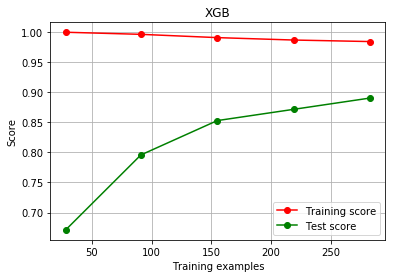

In [30]:
cv = KFold(n_splits=5, shuffle = True, random_state=42)
plot_learning_curve(XGBRegressor(n_estimators=100,random_state=420),"XGB",Xtrain,Ytrain,ax=None,cv=cv)
plt.show()

No handles with labels found to put in legend.


<Figure size 1440x360 with 0 Axes>

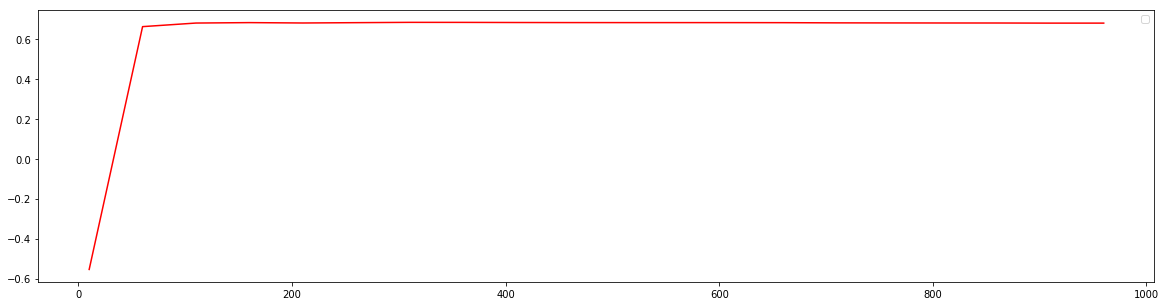

In [34]:
axis = range(10,1010,50)
rs = []
for i in axis:
    reg = XGBRegressor(n_estimators=i,random_state=0, learning_rate=0.3)
    rs.append(cross_val_score(reg,x,y,cv=5).mean())
plt.figure(figsize=(20,5))
plt.legend()
plt.plot(axis,rs,c='red',label='XGB')
plt.show()